In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [11]:
actual_a = [1 for i in range(10)]+[0 for i in range(10)]
predicted_a = [1 for i in range(9)]+[0, 1, 1]+[0 for i in range(8)]
print(actual_a)
print(predicted_a)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
def my_confusion_matrix(actual, predicted):
    tp = len([a for a,p in zip(actual, predicted) if a==p and p==1])
    tn = len([a for a,p in zip(actual, predicted) if a==p and p==0])
    fp = len([a for a,p in zip(actual, predicted) if a!=p and p==1])
    fn = len([a for a,p in zip(actual, predicted) if a!=p and p==0])
    return "[[{}, {}]\n[{}, {}]]".format (tp, fn, fp, tn)

print(my_confusion_matrix(actual_a, predicted_a))
print(confusion_matrix(actual_a, predicted_a))

[[9, 1]
[2, 8]]
[[8 2]
 [1 9]]


In [14]:
def my_accuracy_score(actual, predicted):
    tp = len([a for a,p in zip(actual, predicted) if a==p and p==1])
    tn = len([a for a,p in zip(actual, predicted) if a==p and p==0])
    fp = len([a for a,p in zip(actual, predicted) if a!=p and p==1])
    fn = len([a for a,p in zip(actual, predicted) if a!=p and p==0])
    return (tp+tn)/(tp+tn+fp+fn)

print(my_accuracy_score(actual_a, predicted_a))
print(accuracy_score(actual_a, predicted_a))

0.85
0.85


In [16]:
def my_precision_score(actual, predicted):
    tp = len([a for a,p in zip(actual, predicted) if a==p and p==1])
    fp = len([a for a,p in zip(actual, predicted) if a!=p and p==1])
    return tp/(tp+fp)

print(my_precision_score(actual_a, predicted_a))
print(precision_score(actual_a, predicted_a))

0.8181818181818182
0.8181818181818182


In [17]:
def my_recall_score(actual, predicted):
    tp = len([a for a,p in zip(actual, predicted) if a==p and p==1])
    fn = len([a for a,p in zip(actual, predicted) if a!=p and p==0])
    return tp/(tp+fn)

print(my_recall_score(actual_a, predicted_a))
print(recall_score(actual_a, predicted_a))

0.9
0.9


In [18]:
def my_f1_score(actual, predicted):
    x = my_precision_score(actual, predicted)
    y = my_recall_score(actual, predicted)
    return (2*x*y)/(x+y)

print(my_f1_score(actual_a, predicted_a))
print(f1_score(actual_a, predicted_a))

0.8571428571428572
0.8571428571428572


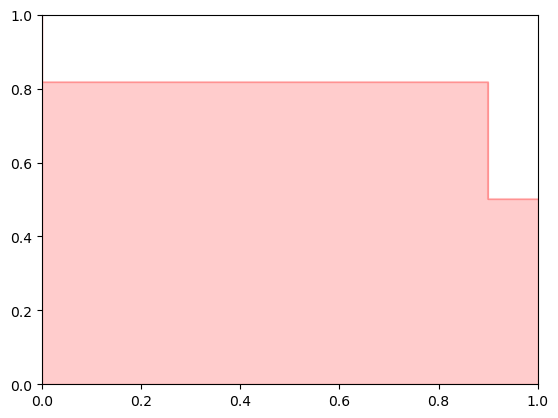

In [23]:
precision, recall, _ = precision_recall_curve(actual_a, predicted_a)
plt.step(recall, precision, color = 'red', alpha = 0.2, where = 'post')
plt.fill_between(recall, precision, color = 'red', alpha = 0.2, step = 'post')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()

0.85


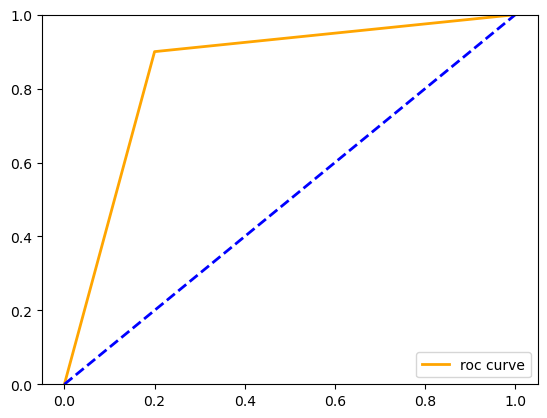

In [28]:
print(roc_auc_score(actual_a, predicted_a))
fpr, tpr, _ = roc_curve(actual_a, predicted_a)
plt.plot(fpr, tpr, color = 'orange', lw = 2, label = 'roc curve')
plt.plot([0,1], [0,1], color = 'blue', lw = 2, linestyle = '--')
plt.xlim = ([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = 'lower right')
plt.show()